In [112]:
import os
import sys
import time
import numpy as np
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.cross_validation import train_test_split
# true, then pred
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

import pickle
from sklearn.externals import joblib

In [87]:
from sknn.mlp import Classifier, Layer

In [2]:
import amyutility as p2

In [4]:
reload(p2)

<module 'amyutility' from 'amyutility.pyc'>

# Load Data

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
print train.shape
print test.shape

(43436, 23)
(14479, 23)


In [7]:
traink = pd.read_csv('data/fromKen/full_train_2.csv')
testk = pd.read_csv('data/fromKen/full_test_2.csv')

In [8]:
print traink.shape
print testk.shape

(43436, 56)
(14479, 55)


# Data Exploration

In [9]:
test.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,Id
0,29.00,M,reg127,1,N,2,Y,N,N,nan,nan,2024.00,nan,N,N,nan,0,0,0,0,0,0,1
1,16.00,M,reg142,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,nan,10,223,0,57,7,0,2
2,22.00,M,reg104,1,N,28,N,N,Y,nan,nan,1668.00,2910.00,N,N,nan,6,6,2,1,0,0,3
3,10.00,M,reg112,1,N,14,N,N,Y,nan,nan,741.00,1107.00,N,N,nan,13,13,0,2,1,0,4
4,14.00,F,reg106,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,nan,14,57,0,16,1,0,5


In [10]:
train.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor'], dtype='object')

## Using Ken's Data

In [11]:
traink.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [12]:
testk.columns

Index([u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [13]:
traink.head()

,lapsed,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,Y,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,N,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,Y,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,Y,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,Y,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [14]:
testk.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,29.00,M,0.11,1,N,2,Y,N,N,1942.12,1811.61,2024.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6.80,10.20,0.00,0.00,0.00,0.00,2.20,3.30
1,16.00,M,0.02,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,3477.56,10,223,0,57,7,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,5.67,8.50,4.80,7.19,10.82,16.23,11.11,16.67
2,22.00,M,0.00,1,N,28,N,N,Y,1942.12,1811.61,1668.00,2910.00,N,N,3477.56,6,6,2,1,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6.27,9.41,3.89,5.84,3.89,5.84,6.73,10.10
3,10.00,M,0.12,1,N,14,N,N,Y,1942.12,1811.61,741.00,1107.00,N,N,3477.56,13,13,0,2,1,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.80,7.19,5.28,7.92,5.28,7.92,5.42,8.12
4,14.00,F,0.04,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,3477.56,14,57,0,16,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,5.42,8.12,5.42,8.12,8.12,12.18,9.77,14.65


In [15]:
traink_y = traink[['lapsed']]

In [16]:
traink_y.head()

,lapsed
0,Y
1,N
2,Y
3,Y
4,Y


In [17]:
traink_x = traink.drop('lapsed', axis=1)

In [18]:
traink_x.shape

(43436, 55)

In [19]:
traink_x.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [20]:
train_y = (traink_y.lapsed.values=='Y')*1

In [21]:
# key train_y
train_y

array([1, 0, 1, ..., 0, 1, 0])

In [22]:
# key test_ids: for writing to predictions
test_ids = test.Id.values
test_ids

array([    1,     2,     3, ..., 14477, 14478, 14479])

In [23]:
# key df_all: combine test and train into df_all, test_idx 
test_idx = traink_x.shape[0]
df_all = pd.concat((traink_x, testk), axis=0)

In [24]:
print df_all.shape
print test_idx

(57915, 55)
43436


#### Key: 
- df_all
- test_idx
- train_y
- test_ids

## Check Types and Convert

- need to convert sex, memtype, mem_mag1, mem_mag2, hasemail, extra, intl
- Can leave bools alone

In [26]:
# CONVERT = ['sex', 'memtype', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl']

### sex

- males 0
- females 1

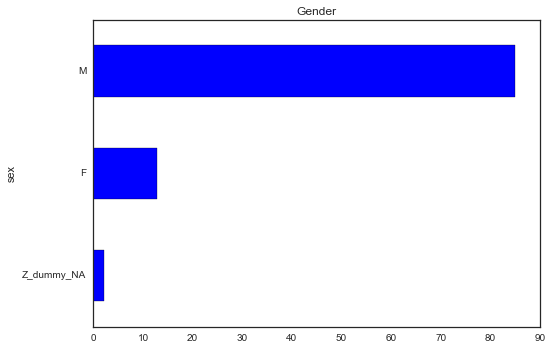

In [27]:
# mostly male (males 0, females 1)
gender = df_all.groupby('sex').size().sort_values(ascending = True)/df_all.shape[0]*100
gender.plot(kind='barh', title = 'Gender')
plt.show()

In [28]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [29]:
df_all.dtypes

age               float64
sex                object
region            float64
nregions            int64
memtype            object
memmonths           int64
mem_mag1           object
mem_mag2           object
hasemail           object
r1                float64
r2                float64
r3                float64
r.quick           float64
extra              object
intl               object
r.intl            float64
allgames1yr         int64
allgames5yr         int64
fastevents          int64
medevents           int64
slowevents          int64
nfloor              int64
age.na              int64
r1.na               int64
r2.na               int64
r3.na               int64
r.quick.na          int64
r.intl.na           int64
mon_less30           bool
mon_31               bool
mon_32               bool
mon_33               bool
mon_34               bool
mon_35               bool
mon_36               bool
mon_37_60            bool
mon_61_84            bool
mon_85_120           bool
mon_121_263 

In [30]:
df_all['sex']

0                 M
1                 M
2                 F
3                 M
4                 F
5                 F
6                 M
7                 M
8                 M
9                 M
10                M
11                M
12                M
13                M
14                M
15                F
16                M
17                M
18                F
19                M
20                M
21                F
22                M
23                M
24                M
25                M
26                M
27                M
28                F
29                M
30                M
31                M
32                M
33                F
34                M
35                M
36                M
37                M
38                M
39                F
40                M
41                M
42                M
43                F
44                M
45                M
46                M
47                M
48                M
49                M


In [31]:
df_all.sex = (df_all.sex.values=='F')*1

In [32]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,0,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,0,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,1,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,0,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,1,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


### memtype
- make Normal the reference category
- memtypeA=1 for affiliate
- memtypeF=1 for family

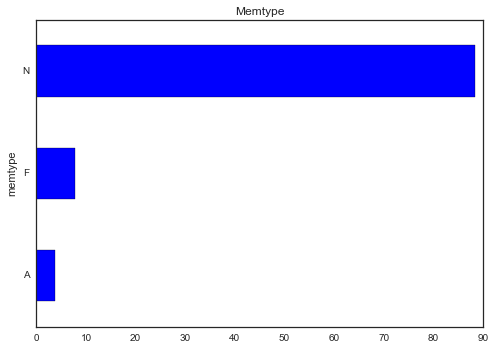

In [35]:
# membership types A, F, N 
memtype = df_all.groupby('memtype').size().sort_values(ascending = True)/df_all.shape[0]*100
memtype.plot(kind='barh', title = 'Memtype')
plt.show()

In [36]:
df_all['memtypeA'] = (df_all.memtype=='A')*1

In [37]:
df_all['memtypeF'] = (df_all.memtype=='F')*1

In [38]:
df_all = df_all.drop('memtype', axis=1)

### mem_mag1 & mem_mag2 & hasemail

- only yes or no... convert yes to 1, no to 0

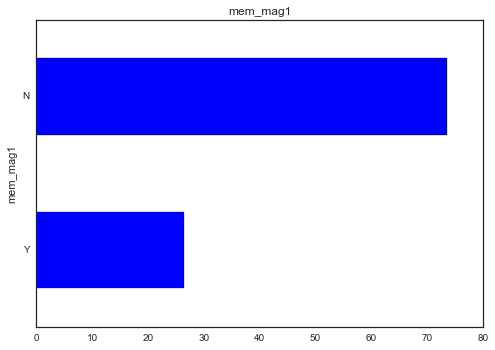

In [39]:
memmag1 = df_all.groupby('mem_mag1').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag1.plot(kind='barh', title = 'mem_mag1')
plt.show()

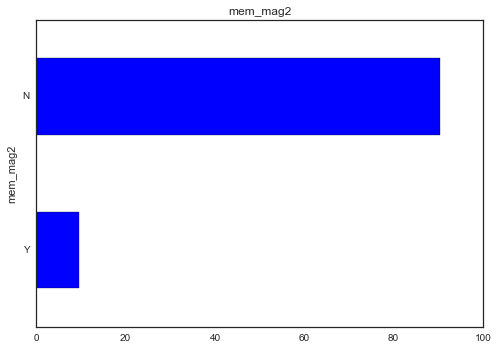

In [40]:
memmag2 = df_all.groupby('mem_mag2').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag2.plot(kind='barh', title = 'mem_mag2')
plt.show()

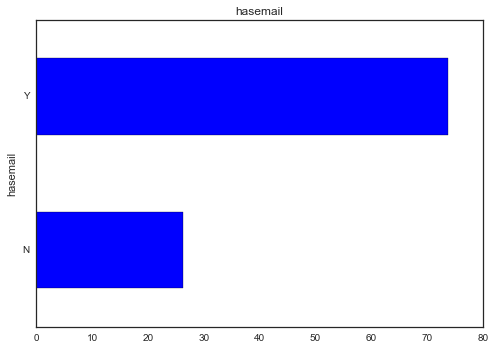

In [41]:
hasemail = df_all.groupby('hasemail').size().sort_values(ascending = True)/df_all.shape[0]*100
hasemail.plot(kind='barh', title = 'hasemail')
plt.show()

In [42]:
df_all.mem_mag1 = (df_all.mem_mag1.values=='Y')*1
df_all.mem_mag2 = (df_all.mem_mag2.values=='Y')*1

In [43]:
df_all.hasemail = (df_all.hasemail.values=='Y')*1

In [44]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


### extra, intl

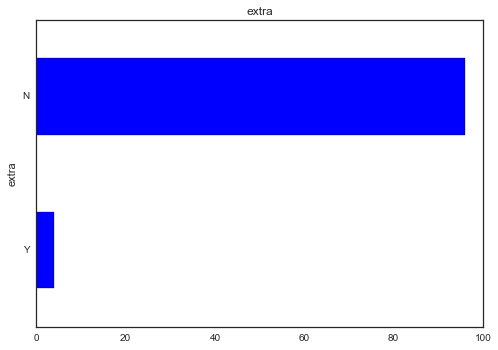

In [45]:
extra = df_all.groupby('extra').size().sort_values(ascending = True)/df_all.shape[0]*100
extra.plot(kind='barh', title = 'extra')
plt.show()

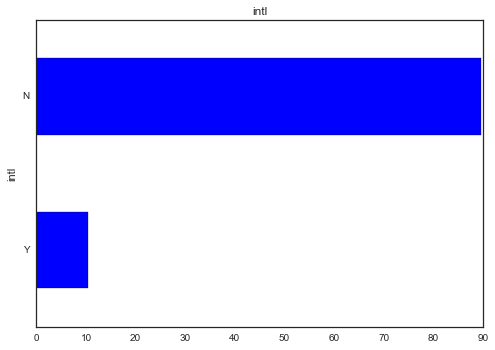

In [46]:
intl = df_all.groupby('intl').size().sort_values(ascending = True)/df_all.shape[0]*100
intl.plot(kind='barh', title = 'intl')
plt.show()

In [47]:
df_all.extra = (df_all.extra.values=='Y')*1
df_all.intl = (df_all.intl.values=='Y')*1

In [48]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


# Feature Engineering

In [49]:
# TODO region is discrete?? 
# last 8 are sq and cubed terms 
STANDARDIZE = ['age', 'region', 'nregions', 'memmonths', 'r1', 'r2', 'r3', 'r.quick', 'r.intl', 
               'allgames1yr', 'allgames5yr', 'fastevents', 'medevents', 'slowevents', 'nfloor', 
              'agesq', 'agecbd', 'allgames1yrsq', 'allgames1yrcbd', 'allgames5yrsq', 'allgames5yrcbd', 'memmonthssq', 
               'memmonthscbd']


INDICATORS = ['sex', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl', 'age.na', 'r1.na', 'r2.na', 
             'r3.na', 'r.quick.na', 'r.intl.na', 'mon_less30', 'mon_31', 'mon_32', 'mon_33', 'mon_34', 
             'mon_35', 'mon_36', 'mon_37_60', 'mon_61_84', 'mon_85_120', 'mon_121_263', 'mon_264_plus', 
             'games_0', 'games_1_5', 'games_6_10', 'games_11_20', 'games_21_34', 'games_35_49', 'games_50_plus', 
             'memtypeA', 'memtypeF']

In [50]:
len(STANDARDIZE) + len(INDICATORS)

56

In [52]:
df_all.shape[1]

56

# Standardize Data

In [53]:
std_scale = preprocessing.StandardScaler().fit(df_all[STANDARDIZE])
std = std_scale.transform(df_all[STANDARDIZE])
df_all[STANDARDIZE] = std

In [55]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,-0.62,0,1.58,-0.18,-0.71,0,0,0,-0.01,-0.00,-0.00,-0.00,0,0,-0.00,-0.62,-0.52,-0.16,-0.46,-0.34,-0.07,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,-0.63,-0.63,-1.36,-1.36,-1.57,-1.57,-0.78,-0.78,0,0
1,1.91,0,1.58,-0.18,0.52,1,0,1,0.35,0.53,0.79,0.79,1,0,-0.00,-0.45,-0.19,0.00,-0.46,0.50,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,1.74,1.74,-0.19,-0.19,0.45,0.45,0.92,0.92,0,0
2,-0.37,1,1.58,-0.18,0.48,0,0,1,-2.00,-1.58,-0.21,-0.00,0,0,-0.00,0.65,-0.19,-0.16,-0.22,-0.26,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,-0.13,-0.13,1.11,1.11,0.45,0.45,0.90,0.90,0,0
3,1.20,0,1.58,-0.18,1.00,1,0,1,0.99,1.05,1.12,-0.00,0,0,-0.00,-0.62,-0.52,-0.16,-0.46,-0.34,-0.07,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,1.37,1.37,-1.36,-1.36,-1.57,-1.57,1.14,1.14,0,0
4,-0.62,1,1.58,-0.18,-0.15,0,0,0,-2.24,-1.79,-0.65,-0.56,0,0,-0.00,-0.10,-0.13,-0.16,0.03,-0.34,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,-0.63,-0.63,0.50,0.50,0.56,0.56,0.43,0.43,0,0


## Utility Functions

In [ ]:
# Females
importance_list = clfForest.feature_importances_
name_list = all_features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-20:]
top_names = name_list[-20:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top 20 Features for Females')
plt.show()

## Interactions? 

# Modeling

In [56]:
track_dict = {}

## Logistic Regression

df_all
test_idx
train_y
test_ids

In [59]:
# KAGGLE: 0.55058 
# test set  0.54623

start = time.time()

modellr = LogisticRegression()

# parameters
penalties = ['l1', 'l2']
cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # default = 1.0
# cs = [0.1, 1]
params = {'penalty': penalties, 'C': cs}
    
predlr = p2.get_pred(modellr, df_all, train_y, 'LR_Ken_asis', track_dict=track_dict, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=params, score_func='log_loss', n_folds=5, predict=True)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############ GRIDSEARCH
BEST {'penalty': 'l1', 'C': 1.0} -0.549837084809
SCORES:  [mean: -0.69315, std: 0.00000, params: {'penalty': 'l1', 'C': 1e-05}, mean: -0.65068, std: 0.00118, params: {'penalty': 'l2', 'C': 1e-05}, mean: -0.69315, std: 0.00000, params: {'penalty': 'l1', 'C': 0.0001}, mean: -0.60274, std: 0.00316, params: {'penalty': 'l2', 'C': 0.0001}, mean: -0.60157, std: 0.00308, params: {'penalty': 'l1', 'C': 0.001}, mean: -0.57350, std: 0.00419, params: {'penalty': 'l2', 'C': 0.001}, mean: -0.56092, std: 0.00448, params: {'penalty': 'l1', 'C': 0.01}, mean: -0.55408, std: 0.00446, params: {'penalty': 'l2', 'C': 0.01}, mean: -0.55034, std: 0.00438, params: {'penalty': 'l1', 'C': 0.1}, mean: -0.54996, std: 0.00431, params: {'penalty': 'l2', 'C': 0.1}, mean: -0.54984, std: 0.00431, params: {'penalty': 'l1', 'C': 1.0}, mean: -0.54985, std: 0.00427, params: {'penalty': 'l2', 'C': 1.0}, mean: -0.54989, std: 0.00427, params: {'penalty': 'l1', 'C': 10.0}, mean: -0.54989, std: 0.00427,

In [ ]:
BEST {'penalty': 'l1', 'C': 1} -0.547849871031 [mean: -0.54851, std: 0.00653, params: {'penalty': 'l1', 'C': 0.1}, 
                                                mean: -0.54915, std: 0.00701, params: {'penalty': 'l2', 'C': 0.1}, 
                                                mean: -0.54785, std: 0.00644, params: {'penalty': 'l1', 'C': 1}, 
                                                mean: -0.54838, std: 0.00682, params: {'penalty': 'l2', 'C': 1}]
############

In [ ]:
{'LR_Ken_asis': [LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.54792442961193033,
  0.54938381530612657]}

In [297]:
write_to_file('predictions/LR_Ken_asis.csv', predlr[:, 1], test_ids)

## Random Forest

In [62]:
start = time.time()

modelrf = RandomForestClassifier()

# parameters
estimators = [50, 150, 250] # default = 10
features = [0.3, 0.5, 0.75, 1.0, 'sqrt', 'log2'] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [1, 5, 10, 25] # default = 1
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}
    
predrf = p2.get_pred(modelrf, df_all, train_y, 'RF_std_Ken_asis', track_dict=track_dict, test_idx=test_idx, train_size=0.8, 
                  columns=None, parameters=params, score_func='log_loss', n_folds=5, predict=True)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############ GRIDSEARCH
BEST {'max_features': 0.5, 'n_estimators': 250, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 25} -0.544138029184
SCORES:  [mean: -0.62463, std: 0.02499, params: {'max_features': 0.3, 'n_estimators': 50, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.57475, std: 0.00597, params: {'max_features': 0.3, 'n_estimators': 150, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.56886, std: 0.00849, params: {'max_features': 0.3, 'n_estimators': 250, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.55250, std: 0.00231, params: {'max_features': 0.3, 'n_estimators': 50, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.54956, std: 0.00327, params: {'max_features': 0.3, 'n_estimators': 150, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.54881, std: 0.00327, params: {'max_features': 0.3, 'n_estimators': 250, 'n_jobs': -1, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.54775, std

In [313]:
# take out grid search options
start = time.time()

# parameters
estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [25, 35, 45] # default = 1
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    for f in features: 
        for s in samples: 
            modelrf = RandomForestClassifier(n_jobs=-1, n_estimators=e, max_features=f, min_samples_leaf=s)
            get_pred(modelrf, df_all, train_y, 'RF_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.47597
Test set error = 0.54099
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.49217
Test set error = 0.54584
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.9, max_leaf_nodes=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.49318
Test set error = 0.53199

# 0.54119 on Kaggle 

# TODO
# more trees, smaller max_features, higher min_samples_leaf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.75, max_leaf_nodes=None,
            min_samples_leaf=45, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.50405
Test set error = 0.53611

In [315]:
modelrf = RandomForestClassifier(n_jobs=-1, n_estimators=350, max_features=0.9, min_samples_leaf=35)
predrf = p2.fit_and_predict(modelrf, df_all, train_y, test_idx)

In [318]:
write_to_file('predictions/RF_Ken_asis2.csv', predrf[:, 1], test_ids)

In [325]:
log_loss(train_y, modelrf.predict_proba(df_all[:test_idx])[:, 1])

0.48887762040303029

## AdaBoost

In [63]:
start = time.time()

modelrfada = AdaBoostClassifier()

estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    modelrfada = AdaBoostClassifier(n_estimators=e)
    p2.get_pred(modelrfada, df_all, train_y, 'RFAda_std', track_dict=None, test_idx=test_idx, train_size=0.8, 
             columns=None, parameters=None, score_func='log_loss', predict=False)

# print '%0.1f seconds runtime' % (time.time() - start)

# write predictions
#write_to_file('predictions/RFada_Ken_asis.csv', predrfada, test_ids)

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=None)
----------
Training set error = 0.69154
Test set error = 0.69167
----------
############
############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=350, random_state=None)
----------
Training set error = 0.69200
Test set error = 0.69203
----------
############
############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None)
----------
Training set error = 0.69232
Test set error = 0.69237
----------
############


## ExtraTrees Classifier

In [332]:
# TODO use n_jobs=-1

start = time.time()

estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
depths = [None] # default = None (i.e. ignored)
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    for f in features: 
        for s in samples: 
            modelrfextra = ExtraTreesClassifier(n_jobs=-1, n_estimators=e, max_features=f, min_samples_leaf=s)
            get_pred(modelrfextra, df_all, train_y, 'RF_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)
print '%0.1f seconds runtime' % (time.time() - start)

# write predictions
#write_to_file('predictions/RFextra_Ken_asis.csv', predrfextra, test_ids)

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.49444
Test set error = 0.53207
----------
############
############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=35, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.50633
Test set error = 0.54558
----------
############
############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, m

In [ ]:
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.75, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.48969
Test set error = 0.53288


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.49444
Test set error = 0.53207

## Other Boosting/Gradient Trees

In [65]:
modelboost = GradientBoostingClassifier(n_estimators=500, max_features=0.75, min_samples_leaf=35, max_depth=3)

predboost = p2.fit_and_predict(modelboost, df_all, train_y, test_idx)


In [347]:
predboost

array([[ 0.15995633,  0.84004367],
       [ 0.33497891,  0.66502109],
       [ 0.18132659,  0.81867341],
       ..., 
       [ 0.49257866,  0.50742134],
       [ 0.2894821 ,  0.7105179 ],
       [ 0.51221351,  0.48778649]])

In [67]:
log_loss(train_y, modelboost.predict_proba(df_all[:test_idx])[:, 1])
# all: 0.50945267198479394
 
# Kaggle 0.53411
# validation 0.50710

0.50923440679552079

In [345]:
write_to_file('predictions/RFBOOST_Ken_asis.csv', predboost[:, 1], test_ids)

In [ ]:
def write_to_file(filename, predict_array, ids):
    predictions = pd.DataFrame({'Id': ids, 'lapsed': predict_array})
        
    # write to csv, with header, drop index
    predictions.to_csv(filename, header=True, index=False)

In [366]:
train_pred = pd.DataFrame(modelboost.predict_proba(df_all[:test_idx])[:, 1]).rename(columns={0: 'lapsed'})

In [367]:
train_pred

,lapsed
0,0.94
1,0.31
2,0.54
3,0.50
4,0.85
5,0.73
6,0.31
7,0.76
8,0.34
9,0.25


In [368]:
train_pred.to_csv('predictions/train_GBRF.csv', header=True, index=False)

In [371]:
df_all.columns

Index([u'age', u'sex', u'region', u'nregions', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus', u'games_0',
       u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd', u'memtypeA', u'memtypeF'],
      dtype='object')

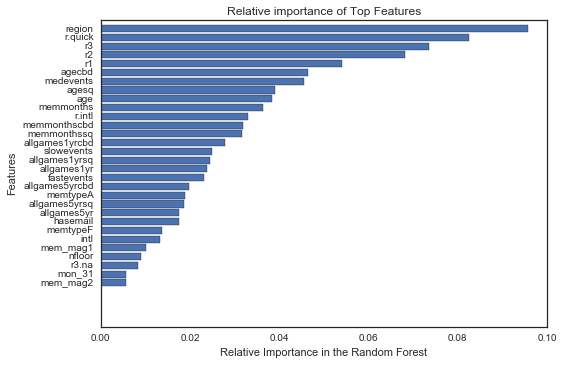

In [68]:
# TODO feature importances??
# Females
importance_list = modelboost.feature_importances_
name_list = df_all.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-30:]
top_names = name_list[-30:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top Features')
plt.show()


In [339]:
start = time.time()

# parameters
estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [2, 3, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d)
                get_pred(modelboost, df_all, train_y, 'RFBoost_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                         columns=None, parameters=None, score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53288
Test set error = 0.54246
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51956
Test set error = 0.53664
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50710
Test set error = 0.52294


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52056
Test set error = 0.53069


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.48193
Test set error = 0.53124


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51498
Test set error = 0.53189

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53091
Test set error = 0.53283


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51990
Test set error = 0.53294



GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53481
Test set error = 0.53373

In [384]:

start = time.time()

# parameters
estimators = [500, 750, 1000] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 40, 55] # default = 1
max_depth = [2, 3, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d)
                get_pred(modelboost, df_all, train_y, 'RFBoost_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                         columns=None, parameters=None, score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52540
Test set error = 0.53787
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50429
Test set error = 0.54128
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=55, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50698
Test set error = 0.52826


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.48362
Test set error = 0.52883

## Generative Classifier - Naive Bayes

In [341]:
clfGNB = GaussianNB()
get_pred(clfGNB, df_all, train_y, 'NaiveBayes', track_dict=None, test_idx=test_idx, train_size=0.8, columns=None,
                  parameters=None, score_func='log_loss', predict=False)

############
GaussianNB()
----------
Training set error = 3.62745
Test set error = 3.55768
----------
############


## SVM

In [81]:
start = time.time()

modelsvc = SVC(probability=True, C=0.5)

Cs=[0.01] # default = 1, try 0.01, 0.1, 1, 10, 100
# penalties = ['l1', 'l2'] 
params = {'C': Cs, 'probability': [True]} # 'penalty': penalties

predlr = p2.get_pred(modelsvc, df_all, train_y, 'SVM', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', n_folds=5, predict=False)

print '%0.1f seconds runtime' % (time.time() - start)


############
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.56045
Test set error = 0.56567
----------
############
588.7 seconds runtime


In [ ]:
############
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.55647
Test set error = 0.57190
----------
############
572.6 seconds runtime



############
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.56045
Test set error = 0.56567
----------
############
588.7 seconds runtime


############
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.56553
Test set error = 0.56934
----------
############
595.3 seconds runtime

## Neural Nets

In [ ]:
# http://scikit-learn.org/dev/modules/neural_networks_supervised.htmlsklearn 
# http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html

In [98]:
start = time.time()

nn = Classifier(
    layers=[
        Layer("Softmax")]*2,
    learning_rate=0.001,
    n_iter=100)

p2.get_pred(nn, df_all, train_y, 'NN', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)

print '%0.1f seconds runtime' % (time.time() - start)

[(34748, 2)]
[(8688, 2)]
############
Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Softmax`: units=2, name=u'hidden0', frozen=False>,
      layers=[<sknn.nn.Layer `Softmax`: units=2, name=u'hidden0', frozen=False>, <sknn.nn.Layer `Softmax`: units=2, name=u'hidden0', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=100, n_stable=10, normalize=None,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)
----------
Training set error = 0.55307
Test set error = 0.54706
----------
############
295.7 seconds runtime


In [ ]:
# try more layers 2 layers: 100 iterations, 0.001 learning rate

# 100 iterations, 0.001 learning rate: 
[(34748, 2)]
[(8688, 2)]
############
Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      layers=[<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=100, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)
----------
Training set error = 0.55157
Test set error = 0.54468
----------
############
262.3 seconds runtime


# 25 iterations all below: 
# 0.001 learning rate
[(34748, 2)]
[(8688, 2)]
############
Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      layers=[<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)
----------
Training set error = 0.55012
Test set error = 0.55049
----------
############


# .0001 learning rate
[(34748, 2)]
[(8688, 2)]
############
Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      layers=[<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.0001, learning_rule=u'sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)
----------
Training set error = 0.55203
Test set error = 0.55114
----------
############

# 0.01 learning rate

[(34748, 2)]
[(8688, 2)]
############
Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      layers=[<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.01, learning_rule=u'sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)
----------
Training set error = 0.60972
Test set error = 0.61454
----------

## KNN Classifier


In [101]:
# parameters
n_neighbors = [5, 25, 100] # default = 5
weights = ['uniform', 'distance']
leaf_size = [10, 30, 100]

for n in n_neighbors:
    for w in weights: 
        for l in leaf_size: 
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=l, n_jobs=-1)
            p2.get_pred(knn, df_all, train_y, 'KNN', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)

############
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
----------
Training set error = 0.42591
Test set error = 2.02984
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
----------
Training set error = 0.42294
Test set error = 2.09477
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
----------
Training set error = 0.42318
Test set error = 2.10851
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')
----------
Training

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')
----------
Training set error = 0.54847
Test set error = 0.55903
----------
############

In [103]:
# parameters
n_neighbors = [100, 200] # default = 5
leaf_size = [10, 30, 100]

for n in n_neighbors: 
    for l in leaf_size: 
        knn = KNeighborsClassifier(n_neighbors=n, leaf_size=l, n_jobs=-1)
        p2.get_pred(knn, df_all, train_y, 'KNN', track_dict=None, test_idx=test_idx, train_size=0.8, 
                 columns=None, parameters=None, score_func='log_loss', predict=False)

############
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')
----------
Training set error = 0.54838
Test set error = 0.55940
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')
----------
Training set error = 0.54757
Test set error = 0.56459
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')
----------
Training set error = 0.54774
Test set error = 0.56683
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=200, p=2,
           weights='uniform')
----------
T

## Voting Classifier

In [111]:
start = time.time()

clf1 = LogisticRegression(penalty='l1', C=1)
clf2 = RandomForestClassifier(n_jobs=-1, n_estimators=350, max_features=0.9, min_samples_leaf=35)
clf3 = GradientBoostingClassifier(n_estimators=500, max_features=0.75, min_samples_leaf=35, max_depth=3)
clf4 = nn = Classifier(
    layers=[
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=100)
clf5 = SVC(probability=True, C=0.5)
clf6 = KNeighborsClassifier(n_neighbors=200, leaf_size=10, n_jobs=-1)

# TODO experiment with weights  weights=[2,1,1]
# predict_proba is not available when voting='hard'
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3), 
                                   ('nn', clf4), ('svc', clf5), ('knn', clf6)], voting='soft')

p2.get_pred(eclf, df_all, train_y, 'voting_std', track_dict=None, test_idx=test_idx, train_size=0.8, 
             columns=None, parameters=None, score_func='log_loss', predict=False)


print '%0.1f seconds runtime' % (time.time() - start)


# Test set error: 0.55104
# Kaggle: 0.54159

KeyboardInterrupt: 

In [106]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3), 
                                   ('nn', clf4), ('svc', clf5), ('knn', clf6)], voting='soft')

pred = p2.fit_and_predict(eclf, df_all, train_y, test_idx)

[(14479, 2)]


In [109]:
pred.shape

(14479,)

In [110]:
p2.write_to_file('predictions/majority_std.csv', pred, test_ids)

In [ ]:
# No weights
############
VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         voting='soft', weights=None)
----------
Training set error = 0.50992
Test set error = 0.53194
----------
############